In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
imagen = cv2.imread('PSI_Tray031_2016-01-05--20-50-09_top.png')

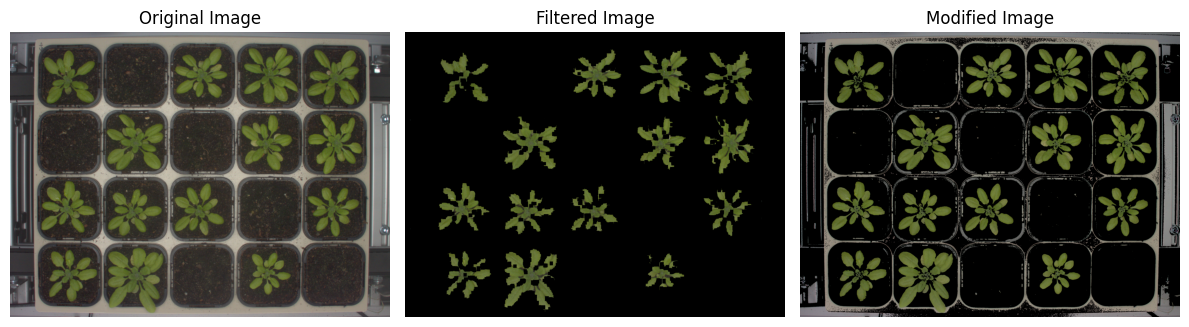

In [25]:
# Check and modify green values before HSV conversion and masking
modified_image = imagen.copy()  # Create a copy to modify
for i in range(modified_image.shape[0]):
    for j in range(modified_image.shape[1]):
        # Check if the green value is greater than 90
        if modified_image[i, j, 1] <= 90 or modified_image[i, j, 1] >= 200:  # Green component
            # If not, set the pixel to black (0, 0, 0)
            modified_image[i, j] = [0, 0, 0]

# Convert the modified image to HSV
imagen_hsv = cv2.cvtColor(modified_image, cv2.COLOR_BGR2HSV)

# Define a range for green values in HSV
verde_bajo = np.array([40, 100, 100])   # Low H, S, V values for green in HSV
verde_alto = np.array([80, 255, 255]) # High H, S, V values for green in HSV

# Create a mask with pixels within the green range
mascara_verde = cv2.inRange(imagen_hsv, verde_bajo, verde_alto)

# Apply an opening operation to eliminate noise
kernel = np.ones((22, 22), np.uint8)  # Kernel for morphological operation (adjust as needed)
mascara_verde = cv2.morphologyEx(mascara_verde, cv2.MORPH_CLOSE, kernel)

# Apply the noiseless mask to the original image
resultado = cv2.bitwise_and(imagen, imagen, mask=mascara_verde)

# Display the original, filtered, and modified image
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Filtered Image')
plt.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Modified Image')
plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()